# Project overview
I scraped pet food product information from the first 10 results pages on these keywords on Amazon: dry dog food, dry cat food, cat food pouches, tinned cat food, tinned dog food, pet food. This is then use to perform market intelligence project that answer the following aspects:price analysis (breadown by tier, low, mid, premium), product features from bullet point and product description, dominant brands and their popularity.

## Import data and initial cleaning
- Drop the unnecessary columns and merge the search engine page data with each product details pages on product ASIN (Amazin unique identifier number)
- Clean reviews count columns as some product doesnt have review the CSS selector will get different values by setting all of it to zero when there is no ratings
- Clean the text by cleaning, trim space, and other word processing for analyzing the text (lemitization, stopwords)
- Create new collumn or transform categorical column into numerical ones

In [654]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from seaborn import heatmap
import seaborn as sns

In [655]:
# import product page data
product_page = pd.read_csv('D:/Data Analysis/pet_foods/Scrapped data/product_details.csv')
product_page = product_page.drop(columns=['search_term','scrape_date','title'])
print(product_page.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2283 entries, 0 to 2282
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   asin             2283 non-null   object 
 1   brand            2283 non-null   object 
 2   categories       2283 non-null   object 
 3   sub_cat_1        2283 non-null   object 
 4   sub_cat_2        2283 non-null   object 
 5   sub_cat_3        2279 non-null   object 
 6   bullet_points    2209 non-null   object 
 7   description      2221 non-null   object 
 8   bestseller_rank  1669 non-null   object 
 9   price_per_unit   2034 non-null   float64
 10  product_details  2238 non-null   object 
 11  image_url        2283 non-null   object 
dtypes: float64(1), object(11)
memory usage: 214.2+ KB
None


In [656]:
#import search page data
search_page = pd.read_csv('D:/Data Analysis/pet_foods/Scrapped data/serp_details.csv')
search_page = search_page.drop(columns=['search_term','scrape_date','scrape_time','scrape_hour'])
# filter out the rows where price is null
search_page = search_page[search_page['price'].notnull() & search_page['price']>0]
print(search_page.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2943 entries, 0 to 3151
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   asin            2943 non-null   object 
 1   page_number     2943 non-null   int64  
 2   position        2943 non-null   int64  
 3   title           2943 non-null   object 
 4   price           2943 non-null   float64
 5   original_price  340 non-null    float64
 6   sponsored       2943 non-null   bool   
 7   reviews_count   2529 non-null   float64
 8   rating          2275 non-null   float64
 9   sales_history   68 non-null     object 
 10  prime           2943 non-null   bool   
dtypes: bool(2), float64(4), int64(2), object(3)
memory usage: 235.7+ KB
None


In [657]:
# merge two dataframes on product asin
data = pd.merge(search_page, product_page, left_on='asin', right_on='asin', how='inner')
data

,asin,page_number,position,title,price,original_price,sponsored,reviews_count,rating,sales_history,...,categories,sub_cat_1,sub_cat_2,sub_cat_3,bullet_points,description,bestseller_rank,price_per_unit,product_details,image_url
0,B09HCN9BM6,1,1,"Felix Purina, Felix, delicious duo, Maxi pack,...",16.09,NaN,True,17.0,4.8,1K+ bought in past month,...,Pet Supplies,Cats,Food,Wet,100 percent complete and balanced Vitamins D a...,Product Description The Delicious Duos from ...,2 in Pet Supplies (See Top 100 in Pet Supplies...,4.30,"{""brand"": ""Felix"", ""flavour"": ""4 varieties: Be...",https://m.media-amazon.com/images/I/81exglxdN4...
1,B0BWN6LYGV,1,2,Felix 12X85G TENDRES EFFILES SELECTION OF THE ...,39.99,NaN,True,1.0,5.0,NaN,...,Pet Supplies,Cats,Food,Wet,Selection of meats|Tender Tapered|Proteins & V...,Product Description Felix is simply irresist...,"16,881 in Pet Supplies (See Top 100 in Pet Sup...",6.67,"{""brand"": ""Felix"", ""flavour"": ""Soft"", ""age_ran...",https://m.media-amazon.com/images/I/81Uzjb6R-T...
2,B08HP7J77F,1,3,FELIX Delicious Wet Double Cat Food Jelly Mix ...,47.99,NaN,True,52.0,4.7,NaN,...,Pet Supplies,Cats,Food,Wet,Wet food for adult cats: variety of taste of t...,Product Description FELIX As good as it look...,6 in Pet Supplies (See Top 100 in Pet Supplies...,47.99,"{""brand"": ""Felix"", ""flavour"": ""As good as it l...",https://m.media-amazon.com/images/I/81BB0zsO02...
3,B08WSZ6C4T,1,4,Felix Mix Cat Food Jelly Selection Wet Food Me...,17.19,20.65,True,467.0,4.7,300+ bought in past month,...,Pet Supplies,Cats,Food,Wet,No artificial flavors added No artificial pres...,Product Description Smart cats know what the...,13 in Pet Supplies (See Top 100 in Pet Supplie...,17.19,"{""brand"": ""Felix"", ""flavour"": ""Beef"", ""age_ran...",https://m.media-amazon.com/images/I/71jDR2fXVu...
4,B018SQLXGC,1,5,"Whiskas Adult 1+ Cat Food with Chicken, 7kg (1...",20.39,NaN,False,115.0,4.7,300+ bought in past month,...,Pet Supplies,Cats,Food,Dry,100% complete and balanced dry cat food that p...,Product Description whiskas 1+ Dry Cat Food ...,7 in Pet Supplies (See Top 100 in Pet Supplies...,2.91,"{""brand"": ""whiskas"", ""flavour"": ""Chicken"", ""ag...",https://m.media-amazon.com/images/I/61sDB4PWCb...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,B0BJQG7D25,7,9,WHISKAS Fish Favourites Fresh Bags in Jelly 4 ...,25.11,NaN,False,1.0,5.0,NaN,...,Pet Supplies,Cats,Food,Dehydrated,Complete and balanced adult cat meal from 1 ye...,Product Description Complete wet food for ad...,NaN,12.31,"{""brand"": ""whiskas"", ""flavour"": ""Salmon"", ""age...",https://m.media-amazon.com/images/I/51RQbKPdHo...
2093,B0BYDTH9QB,7,11,Whiskas Chef's Selection Wet Cat Food in Sauce...,50.24,NaN,False,NaN,NaN,NaN,...,Pet Supplies,Cats,Food,Wet,Delicious taste sensations that combine protei...,Product Description Welcome to our world of ...,NaN,147.76,"{""brand"": ""whiskas"", ""flavour"": ""Beef, poulet,...",https://m.media-amazon.com/images/I/71LmrvN8Qm...
2094,B013JFNPMC,7,13,whiskas 4 packs of crispy cat treats (4 x 60g),12.55,NaN,False,2.0,5.0,NaN,...,Pet Supplies,Cats,Food,Wet,NaN,Indications adults Directions No prepara...,NaN,3.14,"{""brand"": ""whiskas"", ""flavour"": ""Beef"", ""age_r...",https://m.media-amazon.com/images/I/614cI243LK...
2095,B0BWNGQ41F,7,14,Whiskas Wet food for adult cats Birds Selectio...,10.90,NaN,False,1.0,2.0,NaN,...,Pet Supplies,Cats,Food,Wet,Made with high quality protein without artific...,Product Description Each recipe is cooked to...,NaN,32.06,"{""brand"": ""whiskas"", ""flavour"": ""Chicken"", ""ag...",https://m.media-amazon.com/images/I/71zpjN3O9O...


In [658]:
# create discount column where original price is not null
data['discount'] = np.where(data['original_price'].isnull(), 0, (data['original_price'] - data['price']) / data['original_price'] * 100)
data['discount'] = data['discount'].round(0).astype(int)
print(data['discount'].head())

0     0
1     0
2     0
3    17
4     0
Name: discount, dtype: int32


In [659]:
# clean the reviews count column based on rating
data['reviews_count'] = np.where(data['rating'].isnull(), 0, data['reviews_count'])
data['reviews_count'] = data['reviews_count'].fillna(0).astype(int)
# print reviews count and rating columns where rating is null
print(data[['reviews_count', 'rating']].loc[data['rating'].isnull()].head())

     reviews_count  rating
16               0     NaN
17               0     NaN
171              0     NaN
378              0     NaN
379              0     NaN


In [660]:
# clean sales history column
data['sales_history'] = data['sales_history'].fillna(0)
data['sales_last_30_days'] = data['sales_history'].replace(r'\+ bought in past month', '', regex=True)
data['sales_last_30_days'] = data['sales_last_30_days'].replace(r'K','000', regex=True).astype(int)
print(data['sales_last_30_days'].head())

0    1000
1       0
2       0
3     300
4     300
Name: sales_last_30_days, dtype: int32


In [661]:
# clean description and bullet points columns
data['description'] = data['description'].str.replace(r'Product Description', ' ', regex=True)
# trim space
data['description'] = data['description'].str.strip()
data['bullet_points'] = data['bullet_points'].str.strip()
data[['description','bullet_points']]

,description,bullet_points
0,The Delicious Duos from FELIX are tasty meals ...,100 percent complete and balanced Vitamins D a...
1,Felix is simply irresistible Smart cats know w...,Selection of meats|Tender Tapered|Proteins & V...
2,FELIX As good as it looks. Double Delicious We...,Wet food for adult cats: variety of taste of t...
3,"Smart cats know what they want, especially whe...",No artificial flavors added No artificial pres...
4,whiskas 1+ Dry Cat Food was developed in colla...,100% complete and balanced dry cat food that p...
...,...,...
2092,Complete wet food for adult cats aged 1 year a...,Complete and balanced adult cat meal from 1 ye...
2093,Welcome to our world of delicious recipes cont...,Delicious taste sensations that combine protei...
2094,Indications adults Directions No prepara...,NaN
2095,Each recipe is cooked to preserve its deliciou...,Made with high quality protein without artific...


In [662]:
# clean best seller column
# 251 in Pet Supplies (See Top 100 in Pet Supplies) 9 in Dry Dog Food

# remove commas of thousands separator
data['bestseller_rank'] = data['bestseller_rank'].replace(r',', '', regex=True)
data['bestseller_rank'].head()

# best seller rank in main cat - extract the number before 'in' and convert to int
data['BSR_cat'] = data['bestseller_rank'].str.extract(r'(\d+)\s+in')
data['BSR_cat'] = data['BSR_cat']

# best seller rank in sub_cat - extract the number after ")"
data['BSR_subcat'] = data['bestseller_rank'].str.extract(r'\)\s+(\d+)')
data['BSR_subcat'] = data['BSR_subcat']
data[['BSR_cat','BSR_subcat','bestseller_rank']].head()

,BSR_cat,BSR_subcat,bestseller_rank
0,2,2,2 in Pet Supplies (See Top 100 in Pet Supplies...
1,16881,201,16881 in Pet Supplies (See Top 100 in Pet Supp...
2,6,5,6 in Pet Supplies (See Top 100 in Pet Supplies...
3,13,8,13 in Pet Supplies (See Top 100 in Pet Supplie...
4,7,1,7 in Pet Supplies (See Top 100 in Pet Supplies...


In [663]:
# extract sub category in the best seller rank column after 'in'
data['main_cat'] = data['bestseller_rank'].str.extract(r'in\s+([A-Za-z &]+)')
# extract sub category in the best seller rank column after ')' and after number and 'in'
data['sub_cat_4'] = data['bestseller_rank'].str.extract(r'\)\s+\d+\s+in\s+([A-Za-z &]+)')
data['sub_cat_4'] = data['sub_cat_4'].str.strip()
data[['bestseller_rank','sub_cat_4']].head()

,bestseller_rank,sub_cat_4
0,2 in Pet Supplies (See Top 100 in Pet Supplies...,Cat Food Pouches
1,16881 in Pet Supplies (See Top 100 in Pet Supp...,Cat Food Pouches
2,6 in Pet Supplies (See Top 100 in Pet Supplies...,Cat Food Pouches
3,13 in Pet Supplies (See Top 100 in Pet Supplie...,Cat Food Pouches
4,7 in Pet Supplies (See Top 100 in Pet Supplies...,Dry Cat Food


In [664]:
# extract flavor product details column in the list of dictionaries {"flavour": "Salmon"} and convert to string
def extract_flavor(details):
    if isinstance(details, str):
        match = re.search(r'\"flavour\":\s*\"(.*?)\"', details)
        if match:
            return match.group(1)
    return np.nan
data['flavor'] = data['product_details'].apply(extract_flavor)
print(data['flavor'].value_counts())
print(data['flavor'].isnull().sum())
data['flavor'] = data['flavor'].fillna('Not specified')

flavor
Chicken                       467
Beef                          122
Salmon                        112
Lamb                           68
Turkey                         62
                             ... 
XS-S - Chicken Maintenance      1
Chicken and Vegetables          1
Junior Mini                     1
Tuna and herring jellied        1
Beef, poulet, saumon            1
Name: count, Length: 631, dtype: int64
144


In [665]:
# extract specific uses product details column in the list of dictionaries 
def extract_usage(details):
    if isinstance(details, str):
        match = re.search(r'\"specific_uses_for_product\":\s*\"(.*?)\"', details)
        if match:
            return match.group(1)
    return np.nan
data['usage'] = data['product_details'].apply(extract_usage)
print(data['usage'].value_counts())
print(data['usage'].isnull().sum())
data['usage'] = data['usage'].fillna('Not specified')

usage
Sensitive Stomach                     209
Training                               83
Active                                 75
Immune Support                         60
Weight Management                      59
                                     ... 
bones and cartilage.                    1
Leather _ & _ fur                       1
Metabolism                              1
People                                  1
Chats adultes, sant\u00e9 urinaire      1
Name: count, Length: 582, dtype: int64
288


In [666]:
# extract special_ingredients product details column in the list of dictionaries 
def extract_special_ingredients(details):
    if isinstance(details, str):
        match = re.search(r'\"special_ingredients\":\s*\"(.*?)\"', details)
        if match:
            return match.group(1)
    return np.nan
data['special_ing'] = data['product_details'].apply(extract_special_ingredients)
print(data['special_ing'].value_counts())
print(data['special_ing'].isnull().sum())
data['special_ing'] = data['special_ing'].fillna('Not specified')

special_ing
Chicken                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               115
Natural                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [667]:
# extract item_weight or unit_count from product details column in the list of dictionaries  
def extract_weight(details):
    if isinstance(details, str):
        match = re.search(r'\"item_weight\":\s*\"(.*?)\"', details)
        if match:
            return match.group(1)
    return np.nan
data['item_weight'] = data['product_details'].apply(extract_weight)
print(data['item_weight'].isnull().sum())

# when it is kilograms, replace kilograms with nothing and when it is grams multiply by 0.001
def convert_weight_to_kg(weight):
    if isinstance(weight, str):
        weight = weight.lower().replace('kilograms', '').replace('kg', '').strip()
        if 'grams' in weight or 'g' in weight:
            weight = weight.replace('grams', '').replace('g', '').strip()
            try:
                return float(weight) * 0.001
            except ValueError:
                return np.nan
        try:
            return float(weight)
        except ValueError:
            return np.nan
    return np.nan
data['item_weight_kg'] = data['item_weight'].apply(convert_weight_to_kg)
data[['item_weight','item_weight_kg']]

294


,item_weight,item_weight_kg
0,3.74 Kilograms,3.74
1,6.96 Kilograms,6.96
2,10.2 Kilograms,10.20
3,4.3 Kilograms,4.30
4,7 Kilograms,7.00
...,...,...
2092,2040 Grams,2.04
2093,340 Grams,0.34
2094,NaN,NaN
2095,340 Grams,0.34


In [668]:
# # extract and clean brand column from product details column in the list of dictionaries
# def extract_brand(details):
#     if isinstance(details, str):
#         match = re.search(r'\"brand\":\s*\"(.*?)\"', details)
#         if match:
#             return match.group(1)
#     return np.nan
# data['brand_pd'] = data['product_details'].apply(extract_brand)
# data['brand'] = np.where(data['brand_pd'].notnull(), data['brand_pd'], data['brand'])
# print(data['brand'].isnull().sum())

# clean the text of brand column
data['brand'] = data['brand'].str.lower()
data['brand'] = data['brand'].str.replace(r'[^a-zA-Z0-9 &]', '', regex=True)
data['brand'] = data['brand'].str.strip()

# print all the unique values of brand column
print(data['brand'].unique())

['felix' 'whiskas' 'purina' 'friskies' 'iams' 'almo nature'
 'wellness core' 'applaws' 'natures variety' 'brekkies' 'eukanuba' 'mera'
 'sheba' 'royal canin' 'edgard & cooper'
 'affinity advance veterinary diets' 'venandianimal' 'josicat'
 'perfect fit' 'ultima' 'advance' 'josera' 'lilys kitchen' 'nutrivet'
 'franklin' 'verselelaga' 'cici' 'happy cat' 'purina cat chow' 'schesir'
 'marsavet' 'the hunger of the wolf' 'bellfor' 'bosch tiernahrung'
 'carnilove' 'brit' 'arquivet' 'fido' 'wagg' 'josidog' 'dog chow'
 'ultima nature' 'lifelong' 'beneful' 'harringtons' 'frolic' 'dehner'
 'trainer' 'barking heads' 'dog copenhagen' 'acana' 'generico' 'tropidog'
 'pooch & mutt' 'green petfood' 'i love my cat natural cat food'
 'catisfactions' 'gourmet' 'vitakraft' 'meowing heads' 'hilife' 'encore'
 'mjamjam' 'james wellbeloved' 'calibra' 'cttronics' 'natures p' 'uleiva'
 'mars' 'recoactiv' 'greenies' 'reno' 'catit' 'macs katze' 'croci'
 'bozita' 'bozita cat' 'webbox' 'macs' 'cesar' 'dogz finefood' 

In [669]:
# extract number_of_item from product details column in the list of dictionaries
def extract_number_of_item(details):
    if isinstance(details, str):
        match = re.search(r'\"number_of_items\":\s*\"(.*?)\"', details)
        if match:
            return match.group(1)
    return np.nan
data['number_of_item'] = data['product_details'].apply(extract_number_of_item)
print(data['number_of_item'].isnull().sum())

120


In [670]:
# extract the weight from the product title
data['weight'] = data['title'].str.extract(r'(\d+\.?\d*\s*(?:lb|oz|g|kg))', flags=re.IGNORECASE)
data['weight'] = data['weight'].replace(r' ', '', regex=True)
data['weight'] = data['weight'].str.lower().str.strip()
data['weight'].head()

# define a function to convert weight to kgs
def convert_to_kg(weight):
    if pd.isnull(weight):
        return np.nan
    weight = weight.lower().strip()
    match = re.match(r'(\d+\.?\d*)\s*(lb|oz|g|kg)', weight)
    if match:
        value, unit = match.groups()
        value = float(value)
        if unit == 'kg':
            return value
        elif unit == 'g':
            return value / 1000
        elif unit == 'lb':
            return value * 0.453592
        elif unit == 'oz':
            return value * 0.0283495
    return np.nan

# checking applying the function
data['weight_kg'] = data['weight'].apply(convert_to_kg)
# multiply by number_of_item if number_of_item is not null
data['weight_kg'] = np.where(data['number_of_item'].notnull(), data['weight_kg'] * data['number_of_item'].astype(float), data['weight_kg'])
data['weight_kg'] = data['weight_kg'].round(2)

# print weight and weight_kg columns
print(data[['weight','weight_kg']].head())
# print weight and weight_grams columns where weight is is not kg
print(data[['weight','weight_kg']].loc[data['weight'].str.contains(r'(lb)', na=False)].head())

  weight  weight_kg
0    85g       0.08
1    85g       0.51
2    85g       0.08
3    85g       0.08
4    7kg       7.00
    weight  weight_kg
332    4lb       1.81
339   10lb       4.54
342   10lb       4.54
349   25lb      11.34
971    7lb       3.18


C:\Users\thaoc\AppData\Local\Temp\ipykernel_57668\2470469555.py:35: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  print(data[['weight','weight_kg']].loc[data['weight'].str.contains(r'(lb)', na=False)].head())


In [671]:
# fill item_weight_kg with weight_kg if item_weight_kg is null
data['item_weight_kg'] = np.where(data['item_weight_kg'].isnull(), data['weight_kg'], data['item_weight_kg'])
print(data['item_weight_kg'].isnull().sum())

# calculate price per unit weight by dividing price by item_weight_kg if item_weight_kg is not null, and higher than weight_kg
data['price_unit'] = (data['price'] / data['item_weight_kg']).round(2)
data['price_per_unit'] = np.where(data['item_weight_kg'].isnull() | (data['item_weight_kg'] < data['weight_kg']), data['price'] / data['weight_kg'], data['price_unit'])

# if the price_per_unit is null, replace it with price_unit
data['price_per_unit'] = np.where(data['price_per_unit'].isnull(), data['price_unit'], data['price_per_unit'])

# check the result and print the null values
print(data['price_per_unit'].isnull().sum())
data[['item_weight_kg','weight_kg','price','price_unit','price_per_unit']]

25
25


,item_weight_kg,weight_kg,price,price_unit,price_per_unit
0,3.74,0.08,16.09,4.30,4.30
1,6.96,0.51,39.99,5.75,5.75
2,10.20,0.08,47.99,4.70,4.70
3,4.30,0.08,17.19,4.00,4.00
4,7.00,7.00,20.39,2.91,2.91
...,...,...,...,...,...
2092,2.04,0.08,25.11,12.31,12.31
2093,0.34,0.08,50.24,147.76,147.76
2094,0.24,0.24,12.55,52.29,52.29
2095,0.34,0.08,10.90,32.06,32.06


In [672]:
# final dataset
data_clean = data.drop(columns=['bestseller_rank','product_details','item_weight','weight','price_unit','weight_kg','number_of_item','sales_history','original_price','main_cat','categories'])
print(data_clean.info())
data_clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   asin                2097 non-null   object 
 1   page_number         2097 non-null   int64  
 2   position            2097 non-null   int64  
 3   title               2097 non-null   object 
 4   price               2097 non-null   float64
 5   sponsored           2097 non-null   bool   
 6   reviews_count       2097 non-null   int32  
 7   rating              1886 non-null   float64
 8   prime               2097 non-null   bool   
 9   brand               2097 non-null   object 
 10  sub_cat_1           2097 non-null   object 
 11  sub_cat_2           2097 non-null   object 
 12  sub_cat_3           2093 non-null   object 
 13  bullet_points       2031 non-null   object 
 14  description         2043 non-null   object 
 15  price_per_unit      2072 non-null   float64
 16  image_

,asin,page_number,position,title,price,sponsored,reviews_count,rating,prime,brand,...,image_url,discount,sales_last_30_days,BSR_cat,BSR_subcat,sub_cat_4,flavor,usage,special_ing,item_weight_kg
0,B09HCN9BM6,1,1,"Felix Purina, Felix, delicious duo, Maxi pack,...",16.09,True,17,4.8,False,felix,...,https://m.media-amazon.com/images/I/81exglxdN4...,0,1000,2,2,Cat Food Pouches,"4 varieties: Beef-Poultry, Porcupine-Game, Lam...",Active,Vitamins,3.74
1,B0BWN6LYGV,1,2,Felix 12X85G TENDRES EFFILES SELECTION OF THE ...,39.99,True,1,5.0,False,felix,...,https://m.media-amazon.com/images/I/81Uzjb6R-T...,0,0,16881,201,Cat Food Pouches,Soft,Active,Organic,6.96
2,B08HP7J77F,1,3,FELIX Delicious Wet Double Cat Food Jelly Mix ...,47.99,True,52,4.7,False,felix,...,https://m.media-amazon.com/images/I/81BB0zsO02...,0,0,6,5,Cat Food Pouches,As good as it looks. Double tasty,"Muscle Care, Skin and Coat Health",vitamins,10.20
3,B08WSZ6C4T,1,4,Felix Mix Cat Food Jelly Selection Wet Food Me...,17.19,True,467,4.7,False,felix,...,https://m.media-amazon.com/images/I/71jDR2fXVu...,17,300,13,8,Cat Food Pouches,Beef,Muscle Care,Egg,4.30
4,B018SQLXGC,1,5,"Whiskas Adult 1+ Cat Food with Chicken, 7kg (1...",20.39,False,115,4.7,False,whiskas,...,https://m.media-amazon.com/images/I/61sDB4PWCb...,0,300,7,1,Dry Cat Food,Chicken,Cardiac Supply,"Omega 6 fatty acids, zinc",7.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,B0BJQG7D25,7,9,WHISKAS Fish Favourites Fresh Bags in Jelly 4 ...,25.11,False,1,5.0,False,whiskas,...,https://m.media-amazon.com/images/I/51RQbKPdHo...,0,0,NaN,NaN,NaN,Salmon,Digestive Health,"Saumon, thon, poisson blanc, cabillaud blanc",2.04
2093,B0BYDTH9QB,7,11,Whiskas Chef's Selection Wet Cat Food in Sauce...,50.24,False,0,NaN,False,whiskas,...,https://m.media-amazon.com/images/I/71LmrvN8Qm...,0,0,NaN,NaN,NaN,"Beef, poulet, saumon",Weight Management,"M\u00e9lange de pois et carrot, salmon",0.34
2094,B013JFNPMC,7,13,whiskas 4 packs of crispy cat treats (4 x 60g),12.55,False,2,5.0,False,whiskas,...,https://m.media-amazon.com/images/I/614cI243LK...,0,0,NaN,NaN,NaN,Beef,Not specified,Not specified,0.24
2095,B0BWNGQ41F,7,14,Whiskas Wet food for adult cats Birds Selectio...,10.90,False,1,2.0,False,whiskas,...,https://m.media-amazon.com/images/I/71zpjN3O9O...,0,0,NaN,NaN,NaN,Chicken,Weight Management,Not specified,0.34


C:\Users\thaoc\AppData\Local\Temp\ipykernel_57668\1049030782.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_brands['brand'], rotation=45)


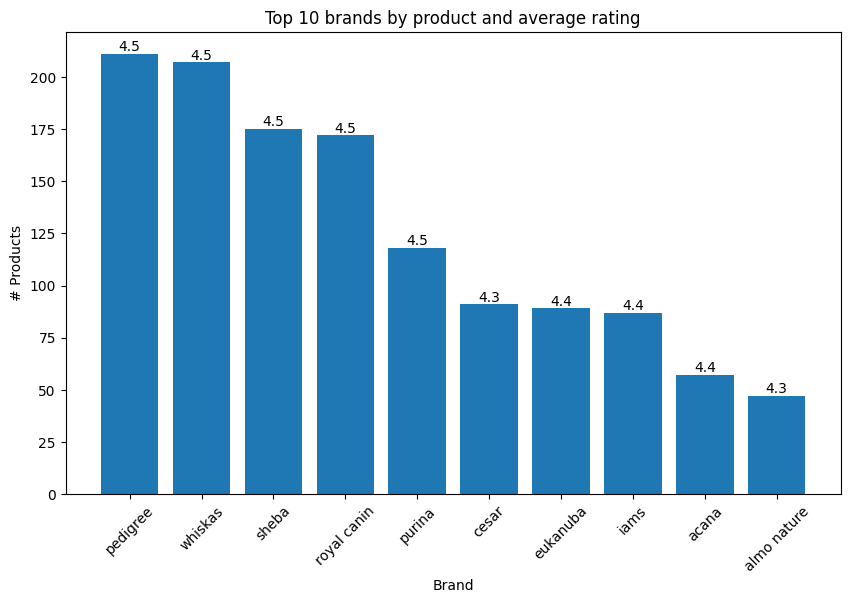

In [673]:
# plot the top 10 brands by product count and average rating
top_brands = data_clean.groupby('brand').agg({'asin':'count', 'rating':'mean'}).rename(columns={'asin':'product_count', 'rating':'avg_rating'}).reset_index()
top_brands = top_brands.sort_values(by='product_count', ascending=False).head(10)
top_brands

fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:blue'
ax1.set_xlabel('Brand')
ax1.set_ylabel('# Products')
bars = ax1.bar(top_brands['brand'], top_brands['product_count'])
ax1.tick_params(axis='y')
ax1.set_xticklabels(top_brands['brand'], rotation=45)
for bar, rating in zip(bars, top_brands['avg_rating']):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{rating:.1f}', ha='center', va='bottom', color='black')
plt.title('Top 10 brands by product and average rating')
plt.show()

C:\Users\thaoc\AppData\Local\Temp\ipykernel_57668\1704045473.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(top_brands_sales['brand'], rotation=0)


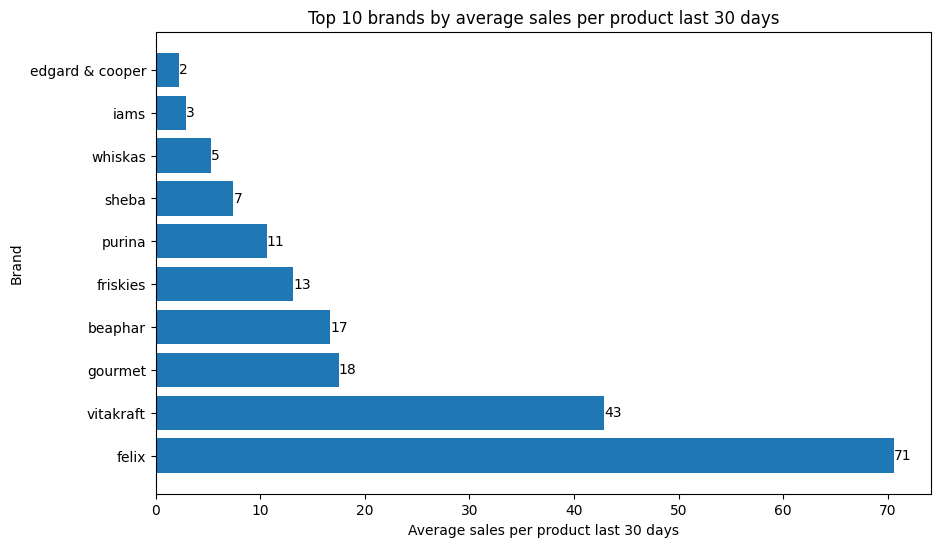

In [674]:
# plot top brand by sales_last_30_days per product in horizontal bar chart
# group by brand and get the mean of sales_last_30_days
top_brands_sales = data_clean.groupby('brand').agg({'sales_last_30_days':'mean', 'asin':'count'}).rename(columns={'sales_last_30_days':'avg_sales_last_30_days', 'asin':'product_count'}).reset_index()
top_brands_sales = top_brands_sales.sort_values(by='avg_sales_last_30_days', ascending=False).head(10)
top_brands_sales
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:blue'
ax1.set_xlabel('Average sales per product last 30 days')
ax1.set_ylabel('Brand')
bars = ax1.barh(top_brands_sales['brand'], top_brands_sales['avg_sales_last_30_days'], color=color)
ax1.tick_params(axis='x')
ax1.set_yticklabels(top_brands_sales['brand'], rotation=0)
for bar, sales in zip(bars, top_brands_sales['avg_sales_last_30_days']):
    width = bar.get_width()
    ax1.text(width, bar.get_y() + bar.get_height()/2.,
             f'{sales:.0f}', ha='left', va='center', color='black')
plt.title('Top 10 brands by average sales per product last 30 days')
plt.show()

C:\Users\thaoc\AppData\Local\Temp\ipykernel_57668\2259323571.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(subcat_price['sub_cat_2'])


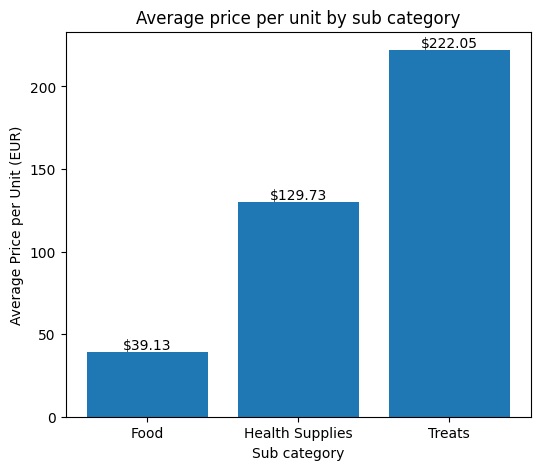

In [675]:
# group by and sub_cat_2 and get the mean of price_per_unit and plot the average price on top of each bar
subcat_price = data_clean.groupby(['sub_cat_2']).agg({'price_per_unit':'mean', 'asin':'count'}).rename(columns={'price_per_unit':'avg_price_per_unit', 'asin':'product_count'}).reset_index()
subcat_price = subcat_price.dropna()
subcat_price
fig, ax1 = plt.subplots(figsize=(6,5))
bars = ax1.bar(subcat_price['sub_cat_2'], subcat_price['avg_price_per_unit'])
ax1.set_xlabel('Sub category')
ax1.set_ylabel('Average Price per Unit (EUR)')
ax1.tick_params(axis='y')
ax1.set_xticklabels(subcat_price['sub_cat_2'])
for bar, price in zip(bars, subcat_price['avg_price_per_unit']):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'${price:.2f}', ha='center', va='bottom', color='black')
plt.title('Average price per unit by sub category')
plt.show()

In [676]:
# top bestseller products
best_seller = data_clean.sort_values(by='BSR_cat', ascending=True).head(10)
best_seller

,asin,page_number,position,title,price,sponsored,reviews_count,rating,prime,brand,...,image_url,discount,sales_last_30_days,BSR_cat,BSR_subcat,sub_cat_4,flavor,usage,special_ing,item_weight_kg
59,B09V1MDKF6,2,5,"SHEBA Mini Fillets – Fresh Sauce, Poultry Sele...",15.75,False,29,4.8,False,sheba,...,https://m.media-amazon.com/images/I/81DeJHsp85...,0,1000,1,1,Cat Food Pouches,Poultry Selection,Sensitive Stomach,Chicken,3.400
1769,B00GMM3CUU,1,27,SHEBA® Mini Fillets in Sauce Fish Selection Fr...,58.13,False,29,4.8,False,sheba,...,https://m.media-amazon.com/images/I/91b0NbR937...,0,0,1,122,Tinned Cat Food,Oceane,Body,Selection of fish,0.085
426,B0CNTBPNB7,1,11,Sheba Sauce Collection Fresh Sachets Wet Food ...,17.99,False,623,4.6,False,sheba,...,https://m.media-amazon.com/images/I/71XHa1y-EM...,10,200,10,1,Tinned Cat Food,Fish,Power Supply,Natural,3.400
162,B0168CYVQC,5,49,Whiskas Adult 1+ – Sterilized Adult Cat Food –...,59.88,False,66,4.7,False,whiskas,...,https://m.media-amazon.com/images/I/71cQuerQiM...,0,0,100,NaN,NaN,Not specified,Not specified,Not specified,1.750
752,B0BXLZ193V,6,18,Brit Care Hypoallergenic Junior Large Breed La...,60.11,False,9,3.8,False,brit,...,https://m.media-amazon.com/images/I/81v4gH8Tdg...,0,0,100,NaN,NaN,Not specified,Not specified,Not specified,10.000
608,B01981K18M,1,1,César Multipack Wet Food Rates for Senior Dogs...,26.36,False,16,4.5,False,cesar,...,https://m.media-amazon.com/images/I/61hl06qQxr...,0,0,1000,7,Tinned Dog Food,"Lamb and peas, beef vegetables, chicken rice, ...",stomach,Peas,3.960
1117,B00BCGXPPI,3,8,catz finefood N°23 Beef & Duck Fine Wet Cat Fo...,24.78,False,106,4.2,False,catz finefood,...,https://m.media-amazon.com/images/I/71XCE2WShm...,0,0,10023,400,Dry Cat Food,"Beef, canard",Immune Support,"canneberges, aloe vera",2.400
492,B0BYYT8QT8,2,38,PURINA ONE Sterilcat with chicken cat food 800...,19.39,False,5,4.7,False,purina,...,https://m.media-amazon.com/images/I/61-rvRw2lI...,0,0,100231,2062,Dry Cat Food,Chicken,No special nutritional goal,"Apple, egg",3.200
79,B0B7KD9TJX,2,37,"Edgard & Cooper Sterilized Cat Food, Adult, (S...",32.99,False,24,4.5,False,edgard & cooper,...,https://m.media-amazon.com/images/I/71CXGW5KHE...,11,0,1003,61,Dry Cat Food,Fresh salmon,Sensitive Stomach,Salmon,4.000
1445,B0089R4IGS,1,8,Royal Canin X-Small Adult | 1.5kg | Dry Dog Fo...,20.95,False,140,4.6,False,royal canin,...,https://m.media-amazon.com/images/I/61iwNJgNo9...,0,0,10057,386,Dry Dog Food,Chicken,Urinary Tract Health,EPA & DHA (Omega-3 Fatty Acids),1.500


# Detailed analysis
## Overall product
## Text analysis

In [677]:
# transalete text into english
from googletrans import Translator
translator = Translator()
def translate_text(text):
    if isinstance(text, str) and text.strip():
        try:
            translated = translator.translate(text, dest='en')
            return translated.text
        except Exception as e:
            print(f"Translation error: {e}")
            return text
    return text
data_clean['title'] = data_clean['title'].apply(translate_text)
data_clean['description'] = data_clean['description'].apply(translate_text)
data_clean['bullet_points'] = data_clean['bullet_points'].apply(translate_text)
data_clean['special_ing'] = data_clean['special_ing'].apply(translate_text)

ModuleNotFoundError: No module named 'cgi'